## Movie Reviews NLTK Sentiment Analysis 

## [ Please star / upvote in case u like it. ]

## CONTENTS::

#### 1) Importing Various Modules

#### 2) Prepare the Data

#### 3) Preprocessing

#### 4) Extracting the Features and Creating the Document Term Matrix (DTM)

#### 5) Creating Training & Validation Sets

#### 6) Modelling Algorithms

#### 7) Conclusions

## 1) Importing Various Modules

In [1]:
# The Natural Language ToolKit.
import nltk   

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# various corpora
from nltk.corpus import movie_reviews as mr  # importing the movie review corpora.

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for part-of-speech tagging
from nltk import pos_tag

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#modelling algos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

#model_selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation
from sklearn.metrics import accuracy_score,roc_auc_score 
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

#preprocessing scikit
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder

#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))
 



## 2) Prepare the Data

In this section I have imported the data. Basically the NLTK corpora has the folder 'movie_reviews' which has two separate folders for positve reviews (pos) and negative reviews(neg).

So I have first got all the filenames (both + and -) using the 'fileids' and then iterated over each review file and got its text into an array.

So basically we have two arrays or lists-one for (+) review and one for (-) review where each element of the array corressponds to one particular review from the NLTL 'movie_reviews' corpora.

In [2]:
# reading text from file and storing it in a array.
file_ids=mr.fileids()
neg_rev=[]
pos_rev=[]

#for negative reviews
for file in file_ids[:1000]:
    rev=str(mr.raw(file))
    neg_rev.append(rev)
    
#for positive reviews
for file in file_ids[1000:]:
    rev=str(mr.raw(file))
    pos_rev.append(rev)

In [3]:
print(len(pos_rev))
print(len(neg_rev))

1000
1000


**At this point the 'pos_rev' array has positive reviews and 'neg_rev' has the negative reviews. We have 1000 reviews of each type.**

We can check this by printing one review of each class.

In [4]:
# just a  positive review
print(pos_rev[0])

print("\n\n")

#just a negative review
print(neg_rev[0])

films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . 
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . 
in other words , don't dismiss this film because of its source . 
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . 
getting the hughes brothers to direct this seems almost as 

At this point we have the arrays consisting of reviews but no indication of whether the review is positive or negative.

So for that we can create the corressponding arrays to store the labels or the "Sentiment" of the review.

In [5]:
# creating corressponding labels for both positve and negative reviews.
pos_label=[]
neg_label=[]
i=0
for i in range(len(pos_rev)):
    pos_label.append("Positive")
i=0
for i in range(len(neg_rev)):
    neg_label.append("Negative")
    

In [6]:
print(len(pos_label))
print(len(neg_label))

1000
1000


#### To better analyze the data we can convert the arrays to the pandas DataFrames; one for each class of review.

In [7]:
# getting data frames from the arrays
i=0
index=[]
for i in range(1000):
    index.append(i)
pos_df=pd.DataFrame(index=index,columns=['Review','Sentiment'])
neg_df=pd.DataFrame(index=index,columns=['Review','Sentiment'])

In [8]:
i=0
for i  in range(1000):
    rev=pos_rev[i]
    pos_df.loc[i,'Review']=rev
    pos_df.loc[i,'Sentiment']=pos_label[i]
i=0   
for i  in range(1000):
    rev=neg_rev[i]
    neg_df.loc[i,'Review']=rev
    neg_df.loc[i,'Sentiment']=neg_label[i]

In [9]:
pos_df.head(5) #DataFrame of positive reviews

,Review,Sentiment
0,films adapted from comic books have had plenty...,Positive
1,every now and then a movie comes along from a ...,Positive
2,you've got mail works alot better than it dese...,Positive
3,""" jaws "" is a rare film that grabs your atten...",Positive
4,moviemaking is a lot like being the general ma...,Positive


In [10]:
neg_df.head(5) # DataFrame of negative reviews

,Review,Sentiment
0,"plot : two teen couples go to a church party ,...",Negative
1,the happy bastard's quick movie review \ndamn ...,Negative
2,it is movies like these that make a jaded movi...,Negative
3,""" quest for camelot "" is warner bros . ' firs...",Negative
4,synopsis : a mentally unstable man undergoing ...,Negative


#### To visualize the words in the (+) and (-) reviews we can use the wordcloud module as shown:

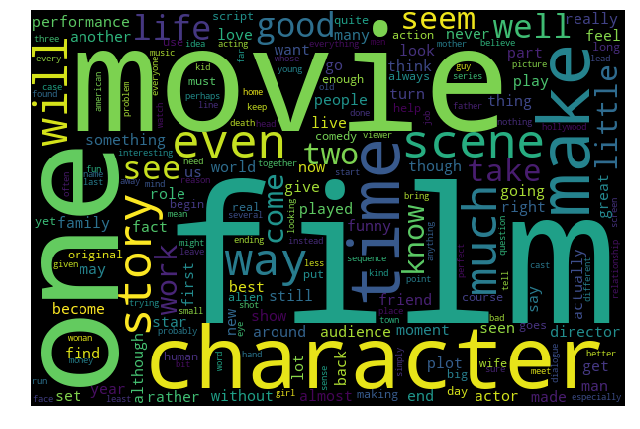

In [11]:
from wordcloud import WordCloud
# Generate a word cloud image for positive reviews
pos_str=''
for string in pos_df['Review']:
    if(string not in stop_words):
        pos_str=pos_str+string+' '
polarity_pos_wordcloud = WordCloud(width=600, height=400).generate(pos_str)
plt.figure( figsize=(9,9))
plt.imshow(polarity_pos_wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

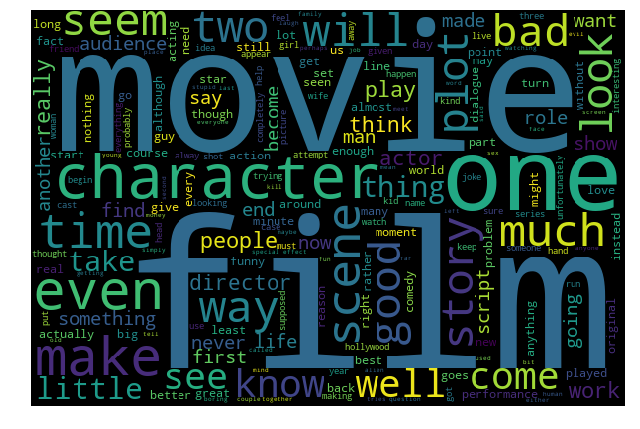

In [12]:
# Generate a word cloud image for negative reviews
neg_str=''
for string in neg_df['Review']:
    if(string not in stop_words):
        neg_str=neg_str+string+' '
polarity_neg_wordcloud = WordCloud(width=600, height=400).generate(neg_str)
plt.figure( figsize=(9,9))
plt.imshow(polarity_neg_wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

Now to do better analysis  further we can combine the positive and negative DataFrames.

In [13]:
# combining (+) and (-) reviews into a single data frame.
df=pd.concat([pos_df,neg_df],ignore_index=True)

In [14]:
print(df.shape)
df.head(10)  # first 10 positive reviews

(2000, 2)


,Review,Sentiment
0,films adapted from comic books have had plenty...,Positive
1,every now and then a movie comes along from a ...,Positive
2,you've got mail works alot better than it dese...,Positive
3,""" jaws "" is a rare film that grabs your atten...",Positive
4,moviemaking is a lot like being the general ma...,Positive
5,"on june 30 , 1960 , a self-taught , idealistic...",Positive
6,"apparently , director tony kaye had a major ba...",Positive
7,one of my colleagues was surprised when i told...,Positive
8,"after bloody clashes and independence won , lu...",Positive
9,the american action film has been slowly drown...,Positive


In [15]:
print(df.shape)
df.tail(10)  # last 10 negative reviews

(2000, 2)


,Review,Sentiment
1990,"man , this was one wierd movie . \nsimilar to ...",Negative
1991,"the king and i , a warner brothers animated , ...",Negative
1992,synopsis : cro-magnon ayla loses her mother to...,Negative
1993,salaries of hollywood top actors are getting o...,Negative
1994,"movies like six days , seven nights make me ma...",Negative
1995,"if anything , "" stigmata "" should be taken as ...",Negative
1996,"john boorman's "" zardoz "" is a goofy cinematic...",Negative
1997,the kids in the hall are an acquired taste . \...,Negative
1998,there was a time when john carpenter was a gre...,Negative
1999,two party guys bob their heads to haddaway's d...,Negative


####  We have 1000 reviews for each class as we can see from the 'countplot' below:

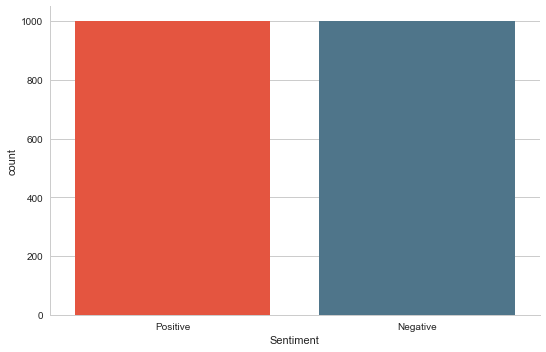

In [16]:
sns.factorplot(data=df,x='Sentiment',kind='count',size=5,aspect=1.5,palette=['#ff4125','#457894']) # 1000 reviews for each class. just to visualize.

## 3)Preprocessing

## 3.1 ) Stopwords

#### Creating a list of English language stopwords. These are the words like 'a' ,'the' etc.. which occur frequently in texts but doesnt convey any special meaning.

In [17]:
# creating a list of stop-words. will be useful later.  
stop_words=set(nltk.corpus.stopwords.words('english'))
print(stop_words)

{"mightn't", 'an', 'should', 'wasn', 'any', 'they', 'only', 'whom', 'a', 'am', 'because', "haven't", 'had', 'i', 'while', 'some', 'do', 'each', "shan't", 'which', 'his', 'ourselves', "you've", "hadn't", "don't", "needn't", 'hadn', 'when', 'those', 'up', 'himself', "it's", 'being', "couldn't", 'mustn', 'ma', 'weren', 'aren', 'wouldn', 'can', "weren't", 'where', 'she', 'very', 'haven', 'now', 'he', "isn't", 'you', 'has', 'against', 'these', 'about', 'below', 'out', 'hers', 'above', 'in', 'doing', 'on', "didn't", 'for', 's', 'of', 're', 'over', "hasn't", 'we', 'same', 'its', "won't", 'mightn', 'll', 'as', 'me', 'into', 'him', 'the', 'then', 'there', 'through', 'their', "should've", 'from', 'm', 'needn', "you're", 'd', 'them', 'been', 'by', 'our', 'other', 'most', 'ours', 'than', 'myself', 'theirs', "you'll", 'themselves', 'to', 'not', 'her', "that'll", 'after', 'such', 'yours', "shouldn't", 'further', 'hasn', 'own', 'won', 'but', 'all', 'ain', 'during', 'that', 'at', 'if', 'did', 'didn', 

## 3.2 ) Normalization

#### In this section I have normalized the text. We can use either Stemming or Lemmatizing. For me Lemmatizing gave better results.

In [18]:
# # for stemming and lemmatizing
i=0
# ps=SnowballStemmer('english')
le=WordNetLemmatizer()
for str in df['Review']:
    tokens=word_tokenize(str)
    temp=set()
    for token in tokens:
        stem_token=le.lemmatize(token)
        temp.add(stem_token)
    temp_str=" ".join(temp)
    df.loc[i,"Review"]=temp_str
    i=i+1

In [19]:
print(df.shape)
df.head()

(2000, 2)


,Review,Sentiment
0,graphic say because flashback shakespeare arri...,Positive
1,stinker personal expect an good should payne a...,Positive
2,order an good mention left any they only scene...,Positive
3,hunted grab because dethroned border mayor may...,Positive
4,hollywood personal slapstick-fu nazi an mentio...,Positive


In [20]:
print(df.shape)
df.tail()

(2000, 2)


,Review,Sentiment
1995,bos because school seeing pretend may dropping...,Negative
1996,order say because unintentionally worked menac...,Negative
1997,bunch exception additional audience cure devel...,Negative
1998,say an good mention any -clever they a lost be...,Negative
1999,exception _21_jump_street_ stonily beyond club...,Negative


## 4) Extracting the Features and Creating the Document Term Matrix (DTM)

**This is the crux of the notebook. In this part we actually create the features from our reviews that can be fed to a machine learning model.**

**I have used the Bag of Words(BOW) approach and not the Word2Vec**.

Now to do this we can either just fill in every value with 'True' which is very very basic. 

To do something more we can actually use a Tfidf vectorizer or a CountVectorizer (which considers the count of word in document) which marks the **TF-IDF ie (Term Frequency Inverse Document Frequency)** for each of the word (or feature) in every document.

**This is known as the Document Term Matrix (DTM) (represented by dtm_df DataFrame) . Every row corressponds to one document which in our case is one review and every columns is a unique feature (or word).**

**Hence if dtm_df[i,j] =k then this means that the 'i'th feature or word has 'k' TF-IDF in the 'j'th document.**

In [21]:
# extracting features from the text. Can use CountVectorizer also.
vect =TfidfVectorizer(stop_words=stop_words) # to play with. min_df,max_df,max_features etc...
X=vect.fit_transform(df['Review'])
Y=df['Sentiment']

**Note the parameters of the Tfidf vectorizer from sklearn. You can tune min_df (minimum term frequency) and max_df(maximum term frequency) or max_features (the maximum number of features to extract from text).**

Also another useful parameter is 'ngram_range' which you can tweek if you want ngrams(n words together). 

I havent specified with min_df and max_df and max_features as for me the defailt seems to give best results. Also I havent tuned ngram_range as on my PC the possible no of extracted features limits the processing capacity and is taking too much time ;(.

Now we can have a look at the extracted features as shown:

In [22]:
# print(vect.vocabulary_) # the extraced features

In [23]:
# print(vect.get_feature_names()) # the extraced features

A better way to see the extraced features is to see via a word cloud. Not so good though;)

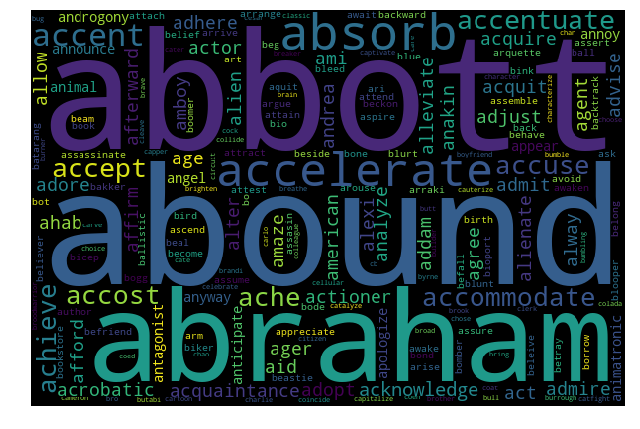

In [24]:
list=vect.get_feature_names()
features=""
for feature in list:
    features=features+feature+" "
wordcloud = WordCloud(width=600, height=400).generate(features)
plt.figure( figsize=(9,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

#### The Document Term Matrix (DTM) is now actually created by creating a DataFrame as shown:

In [25]:
# creating a DataFrame from the extraced features. This is basically Document Term Matrix (DTM)
dtm_df=pd.DataFrame(X.toarray(), columns=vect.get_feature_names()) 

le=LabelEncoder()
dtm_df['Sentiment']=le.fit_transform(df['Sentiment'])

In [26]:
print(dtm_df.shape)
dtm_df.head(10)

(2000, 35448)


,00,000,0009f,007,00s,03,04,05,05425,10,...,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz,Sentiment
0,0.07535,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.00000,0.044137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


#### Note the sparsity. Most of the values are filled with a '0' obviously as not all the words are present in all the documents or reviews.

## 5) Creating Training & Validation Sets

In [27]:
x_train,x_test,y_train,y_test=train_test_split(dtm_df.drop(['Sentiment'],axis=1),dtm_df['Sentiment'],test_size=0.20,random_state=42)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 35447)
(400, 35447)
(1600,)
(400,)


#### Note one thing carefully. The no of columns in training set is 35447 which is actually the size of the extracted features.

#### Also note that Lemmatizing reduces the size of the extracted vocab. You can try the same by commenting the 'Lemmatizer' cell and note that the size of the vocab in that case reaches to a little  less than 40K which is way too much.

## 6) Modelling Algorithms

#### LOGISTIC REGRESSION

In [29]:
clf_lr=LogisticRegression(C=150)
clf_lr.fit(x_train,y_train)
pred=clf_lr.predict(x_test)
print("The accuracy of Logistic Regression :" , accuracy_score(pred,y_test)) 
print("The classification report is : \n"+classification_report(pred,y_test))

The accuracy of Logistic Regression : 0.855
The classification report is : 
             precision    recall  f1-score   support

          0       0.87      0.85      0.86       205
          1       0.84      0.86      0.85       195

avg / total       0.86      0.85      0.86       400



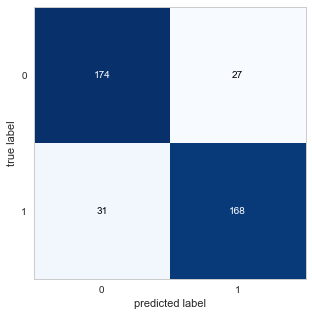

In [30]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat ,  figsize=(10, 5))
plt.show()

#### GAUSSIAN NAIVE BAYES

In [31]:
clf_gnb=GaussianNB()
clf_gnb.fit(x_train,y_train)
pred=clf_gnb.predict(x_test)
print("The accuracy of Gaussian Naive Bayes :" , accuracy_score(pred,y_test)) 
print("The classification report is : \n"+classification_report(pred,y_test))

The accuracy of Gaussian Naive Bayes : 0.62
The classification report is : 
             precision    recall  f1-score   support

          0       0.52      0.65      0.58       159
          1       0.72      0.60      0.65       241

avg / total       0.64      0.62      0.62       400



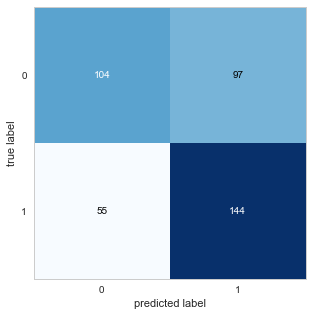

In [32]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat ,  figsize=(10, 5))
plt.show()

#### MULTINOMIAL NAIVE BAYES

In [33]:
clf_mnb=MultinomialNB()
clf_mnb.fit(x_train,y_train)
pred=clf_mnb.predict(x_test)
print("The accuracy of Multinomial Naive Bayes :" , accuracy_score(pred,y_test)) 
print("The classification report is : \n"+classification_report(pred,y_test))

The accuracy of Multinomial Naive Bayes : 0.84
The classification report is : 
             precision    recall  f1-score   support

          0       0.81      0.86      0.84       189
          1       0.87      0.82      0.84       211

avg / total       0.84      0.84      0.84       400



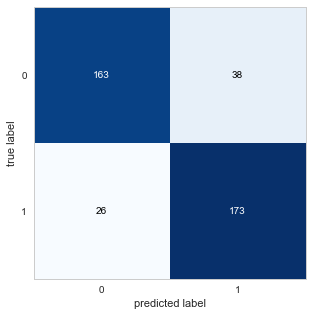

In [34]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat ,  figsize=(10, 5))
plt.show()

## 7) Conclusions

There are a couple of points that we need to consider:

**1 )First of all for preprocessing I have used the Lemmatizer as it gave better results for me. One can also try one of the possible Stemmers from the NLTK.**

**2 )Secondly to create the DTM I have used the Tfidf vectorizer. Using Count or Hash vectorizer is also an option.**

**3) Also you can limit the no of features in vocab by setting the 'max_features' parameter. This is helpful if you dont have much processing capacity and cant handle such large number of features.**

**4) Note also that I have used only basic modelling algos. This is bcoz for such a large no of features(~40K) other models like SVM etc will take much time and are not so good.**

**5 ) Lastly tuning the parameters of the algo using the GridSearch module is always an option.**

## THE END!!!

## [Please star / upvote in case it was helpful;]